In [1]:
from helper import*
import params as cfg
import sys
sys.path.insert(1, '/Users/joshuaighalo/Documents/GitHub/eegDementia')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:

"Functions utilized in this script"
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)
def multipleAvgBandPower(input_3d,fs,low,high):
    avg_out = []
    for i in range(input_3d.shape[0]):
        avg_out.append(avgBandPower(input_3d[i,:,:],fs,low,high))
    return np.array(avg_out)
def multipleArtfRemoval(input_3d,threshold_value,timearray,len_window,step_size,channels):
    artf_out = []
    for i in range(input_3d.shape[0]):
        artf_out.append(ar_maximumgradient(input_3d[i,:,:],threshold_value,timearray,len_window,step_size,channels))
    return np.array(artf_out)

In [3]:
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [4]:
#   Extract eeg data fro participants within the groups
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
time_s = np.arange(0,cfg.collection_time,1/cfg.fs)

In [5]:
#   Notch filters data collected from participants
noc_M11 = multipleFilesNotch(M11,cfg.fs)
noc_M21 = multipleFilesNotch(M21,cfg.fs)
noc_M12 = multipleFilesNotch(M12,cfg.fs)
noc_M22 = multipleFilesNotch(M22,cfg.fs)
noc_C11 = multipleFilesNotch(C11,cfg.fs)
noc_C21 = multipleFilesNotch(C21,cfg.fs)
noc_C12 = multipleFilesNotch(C12,cfg.fs)
noc_C22 = multipleFilesNotch(C22,cfg.fs)

In [6]:
#   Bandpass filters data collected from participants
band_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
band_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
band_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
band_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)
band_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
band_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
band_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
band_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

maximum gradient value of worst segment for TP9 is 11.147570
minimum gradient value of best segment for TP9 is 2.089776
number of non-artifactual segements for TP9 is 235
number of artifactual segements for TP9 is 5


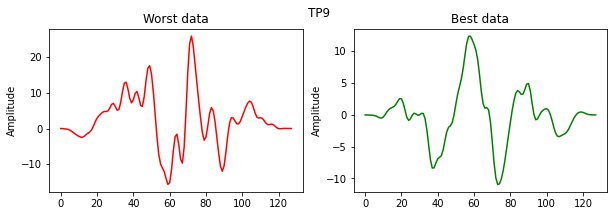

maximum gradient value of worst segment for AF7 is 9.604142
minimum gradient value of best segment for AF7 is 1.421602
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


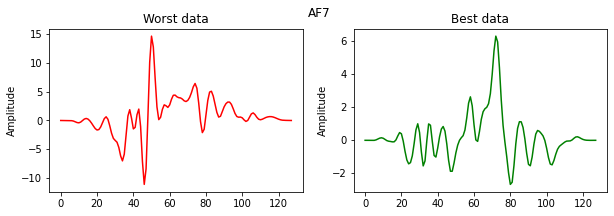

maximum gradient value of worst segment for AF8 is 8.809392
minimum gradient value of best segment for AF8 is 0.999821
number of non-artifactual segements for AF8 is 240
number of artifactual segements for AF8 is 0


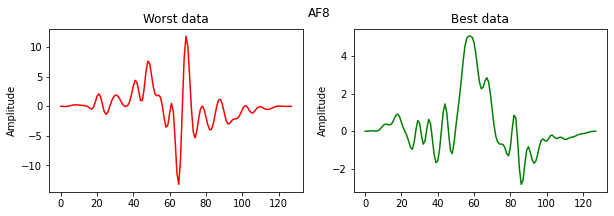

maximum gradient value of worst segment for TP10 is 14.829958
minimum gradient value of best segment for TP10 is 3.264284
number of non-artifactual segements for TP10 is 221
number of artifactual segements for TP10 is 19


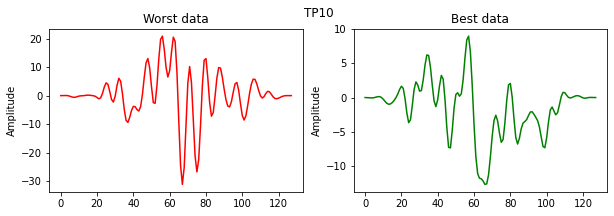

maximum gradient value of worst segment for TP9 is 19.309545
minimum gradient value of best segment for TP9 is 2.153278
number of non-artifactual segements for TP9 is 234
number of artifactual segements for TP9 is 6


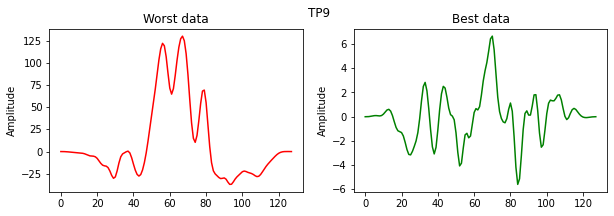

maximum gradient value of worst segment for AF7 is 7.962593
minimum gradient value of best segment for AF7 is 1.190079
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


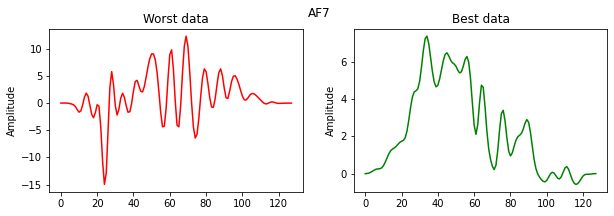

maximum gradient value of worst segment for AF8 is 9.715183
minimum gradient value of best segment for AF8 is 1.584071
number of non-artifactual segements for AF8 is 240
number of artifactual segements for AF8 is 0


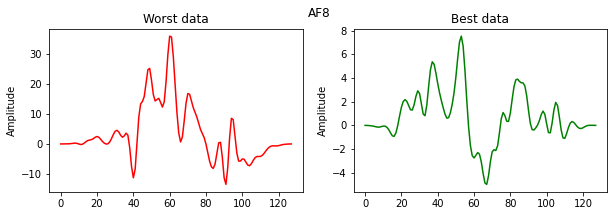

maximum gradient value of worst segment for TP10 is 23.008325
minimum gradient value of best segment for TP10 is 2.343327
number of non-artifactual segements for TP10 is 231
number of artifactual segements for TP10 is 9


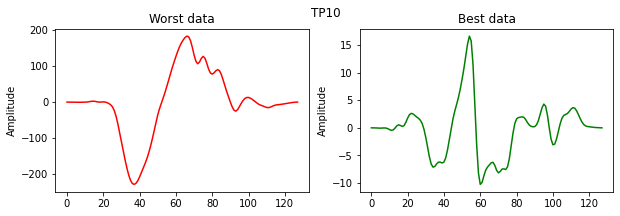

maximum gradient value of worst segment for TP9 is 12.468210
minimum gradient value of best segment for TP9 is 2.688272
number of non-artifactual segements for TP9 is 233
number of artifactual segements for TP9 is 7


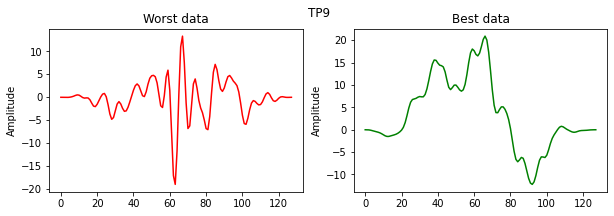

maximum gradient value of worst segment for AF7 is 23.770549
minimum gradient value of best segment for AF7 is 1.459179
number of non-artifactual segements for AF7 is 238
number of artifactual segements for AF7 is 2


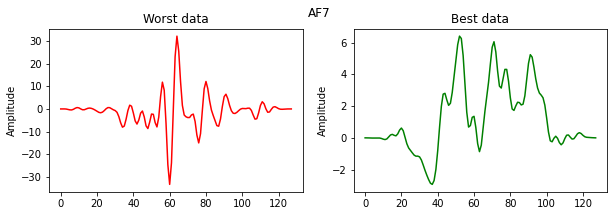

maximum gradient value of worst segment for AF8 is 18.458277
minimum gradient value of best segment for AF8 is 0.889692
number of non-artifactual segements for AF8 is 237
number of artifactual segements for AF8 is 3


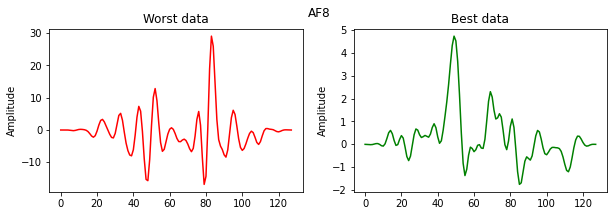

maximum gradient value of worst segment for TP10 is 14.918829
minimum gradient value of best segment for TP10 is 3.324184
number of non-artifactual segements for TP10 is 211
number of artifactual segements for TP10 is 29


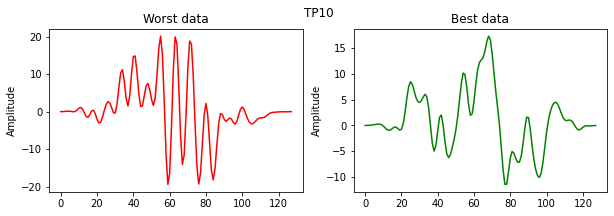

maximum gradient value of worst segment for TP9 is 16.717231
minimum gradient value of best segment for TP9 is 2.165464
number of non-artifactual segements for TP9 is 236
number of artifactual segements for TP9 is 4


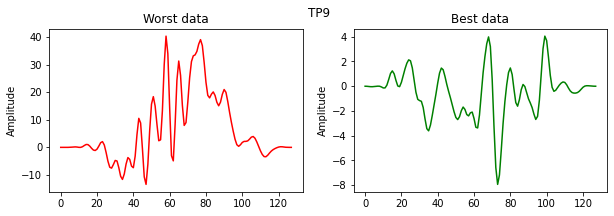

maximum gradient value of worst segment for AF7 is 48.955883
minimum gradient value of best segment for AF7 is 1.504214
number of non-artifactual segements for AF7 is 235
number of artifactual segements for AF7 is 5


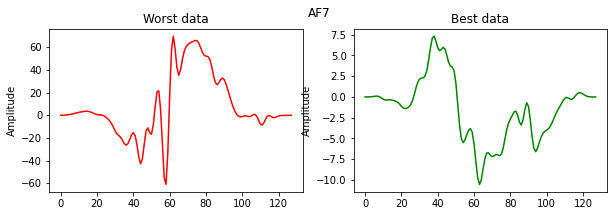

maximum gradient value of worst segment for AF8 is 24.780511
minimum gradient value of best segment for AF8 is 0.854669
number of non-artifactual segements for AF8 is 233
number of artifactual segements for AF8 is 7


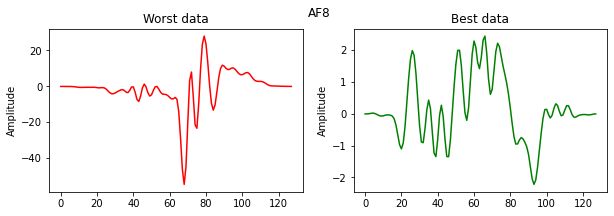

maximum gradient value of worst segment for TP10 is 540.460448
minimum gradient value of best segment for TP10 is 3.441590
number of non-artifactual segements for TP10 is 217
number of artifactual segements for TP10 is 23


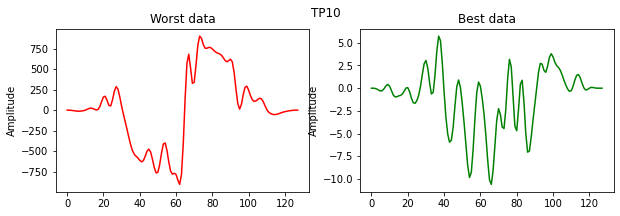

maximum gradient value of worst segment for TP9 is 12.795864
minimum gradient value of best segment for TP9 is 2.094354
number of non-artifactual segements for TP9 is 234
number of artifactual segements for TP9 is 6


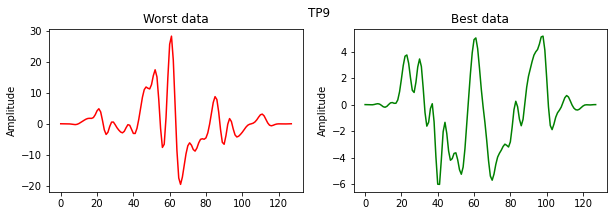

maximum gradient value of worst segment for AF7 is 41.670765
minimum gradient value of best segment for AF7 is 1.306572
number of non-artifactual segements for AF7 is 233
number of artifactual segements for AF7 is 7


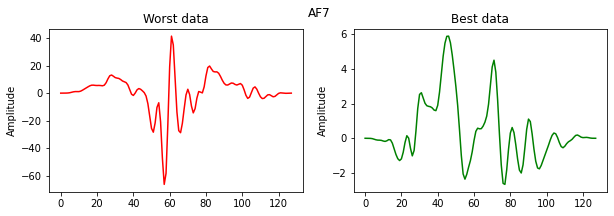

maximum gradient value of worst segment for AF8 is 13.022012
minimum gradient value of best segment for AF8 is 1.543730
number of non-artifactual segements for AF8 is 235
number of artifactual segements for AF8 is 5


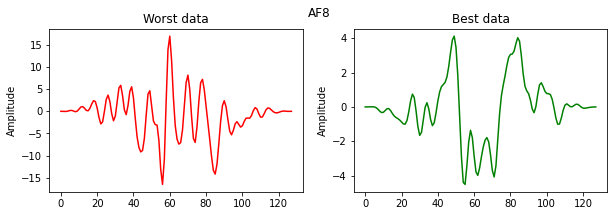

maximum gradient value of worst segment for TP10 is 10.272226
minimum gradient value of best segment for TP10 is 1.974491
number of non-artifactual segements for TP10 is 236
number of artifactual segements for TP10 is 4


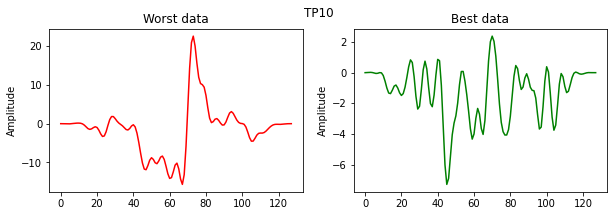

maximum gradient value of worst segment for TP9 is 14.606622
minimum gradient value of best segment for TP9 is 2.651519
number of non-artifactual segements for TP9 is 232
number of artifactual segements for TP9 is 8


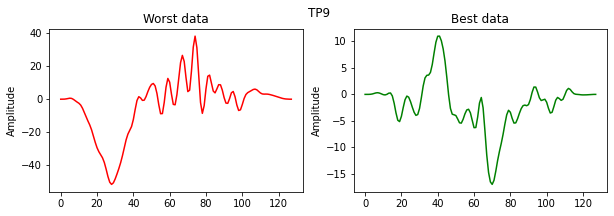

maximum gradient value of worst segment for AF7 is 6.265068
minimum gradient value of best segment for AF7 is 1.376859
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


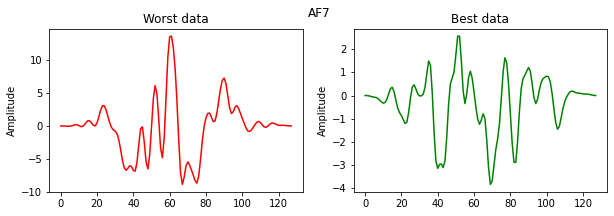

maximum gradient value of worst segment for AF8 is 54.602667
minimum gradient value of best segment for AF8 is 2.004959
number of non-artifactual segements for AF8 is 230
number of artifactual segements for AF8 is 10


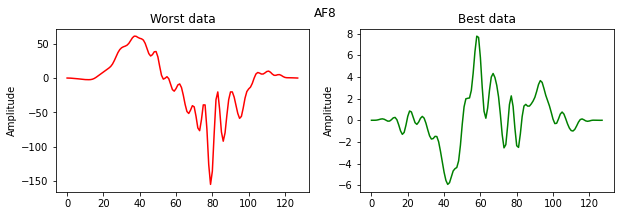

maximum gradient value of worst segment for TP10 is 13.874085
minimum gradient value of best segment for TP10 is 2.177930
number of non-artifactual segements for TP10 is 238
number of artifactual segements for TP10 is 2


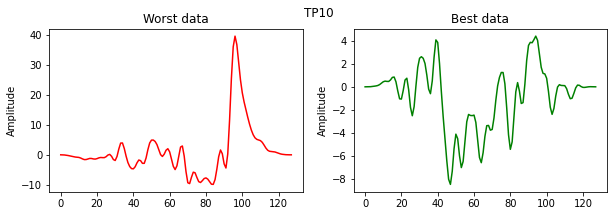

maximum gradient value of worst segment for TP9 is 229.020984
minimum gradient value of best segment for TP9 is 3.942513
number of non-artifactual segements for TP9 is 193
number of artifactual segements for TP9 is 47


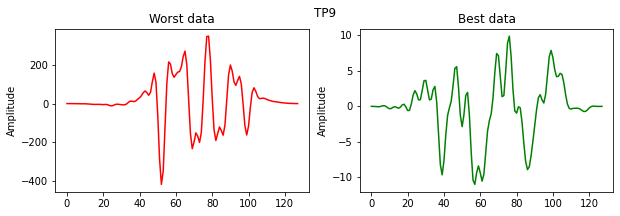

maximum gradient value of worst segment for AF7 is 23.053671
minimum gradient value of best segment for AF7 is 0.774008
number of non-artifactual segements for AF7 is 236
number of artifactual segements for AF7 is 4


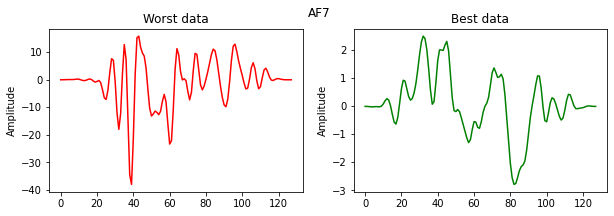

maximum gradient value of worst segment for AF8 is 28.298291
minimum gradient value of best segment for AF8 is 1.161917
number of non-artifactual segements for AF8 is 235
number of artifactual segements for AF8 is 5


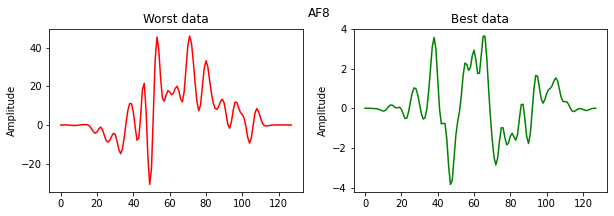

maximum gradient value of worst segment for TP10 is 61.847274
minimum gradient value of best segment for TP10 is 5.958137
number of non-artifactual segements for TP10 is 141
number of artifactual segements for TP10 is 99


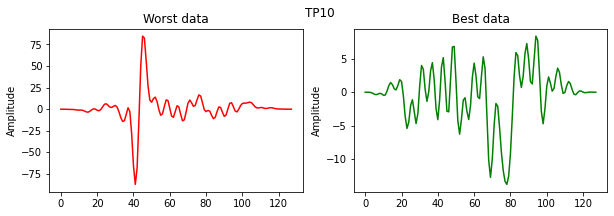

maximum gradient value of worst segment for TP9 is 12.023577
minimum gradient value of best segment for TP9 is 1.810958
number of non-artifactual segements for TP9 is 236
number of artifactual segements for TP9 is 4


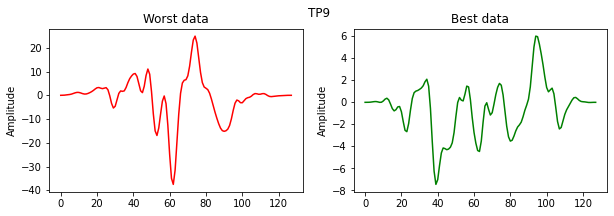

maximum gradient value of worst segment for AF7 is 28.659685
minimum gradient value of best segment for AF7 is 0.837889
number of non-artifactual segements for AF7 is 232
number of artifactual segements for AF7 is 8


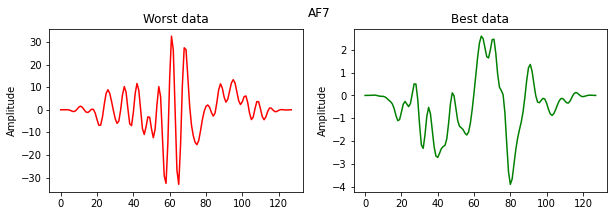

maximum gradient value of worst segment for AF8 is 36.747719
minimum gradient value of best segment for AF8 is 1.048740
number of non-artifactual segements for AF8 is 222
number of artifactual segements for AF8 is 18


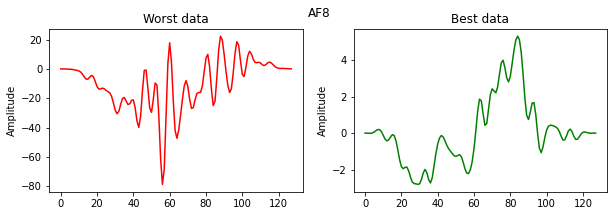

maximum gradient value of worst segment for TP10 is 10.911292
minimum gradient value of best segment for TP10 is 2.430794
number of non-artifactual segements for TP10 is 238
number of artifactual segements for TP10 is 2


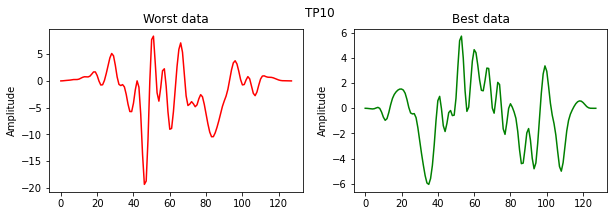

maximum gradient value of worst segment for TP9 is 12.505338
minimum gradient value of best segment for TP9 is 2.381359
number of non-artifactual segements for TP9 is 234
number of artifactual segements for TP9 is 6


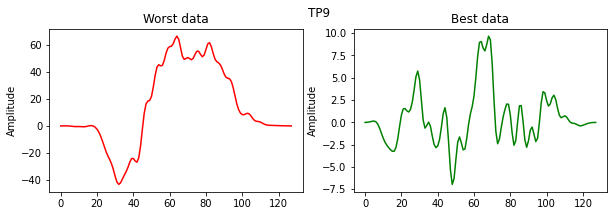

maximum gradient value of worst segment for AF7 is 33.827878
minimum gradient value of best segment for AF7 is 1.056137
number of non-artifactual segements for AF7 is 233
number of artifactual segements for AF7 is 7


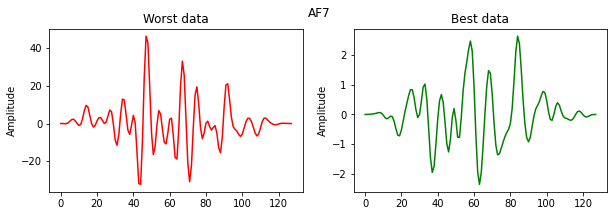

maximum gradient value of worst segment for AF8 is 26.034395
minimum gradient value of best segment for AF8 is 1.299096
number of non-artifactual segements for AF8 is 232
number of artifactual segements for AF8 is 8


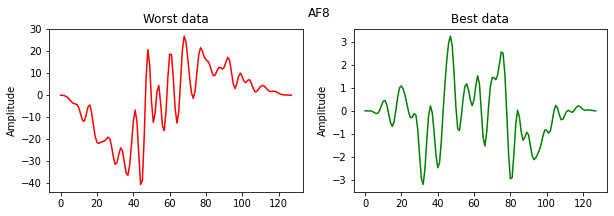

maximum gradient value of worst segment for TP10 is 30.282328
minimum gradient value of best segment for TP10 is 5.755889
number of non-artifactual segements for TP10 is 131
number of artifactual segements for TP10 is 109


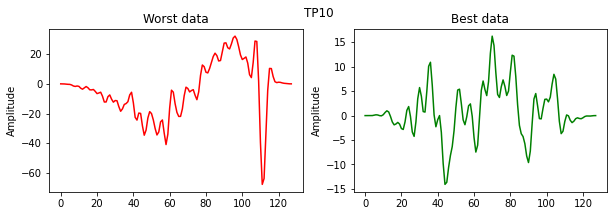

maximum gradient value of worst segment for TP9 is 13.929523
minimum gradient value of best segment for TP9 is 1.782866
number of non-artifactual segements for TP9 is 237
number of artifactual segements for TP9 is 3


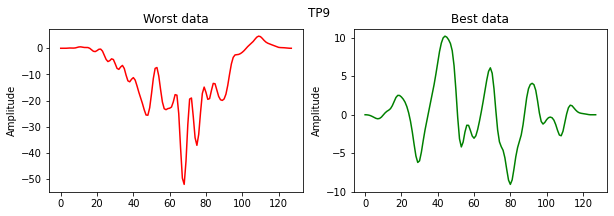

maximum gradient value of worst segment for AF7 is 7.705924
minimum gradient value of best segment for AF7 is 0.873055
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


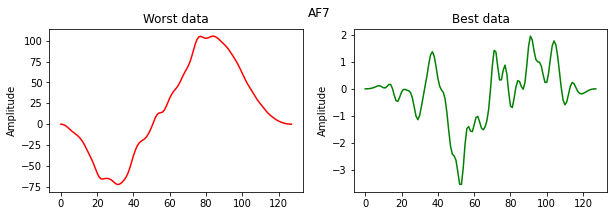

maximum gradient value of worst segment for AF8 is 293.385065
minimum gradient value of best segment for AF8 is 97.199619
number of non-artifactual segements for AF8 is 0
number of artifactual segements for AF8 is 240


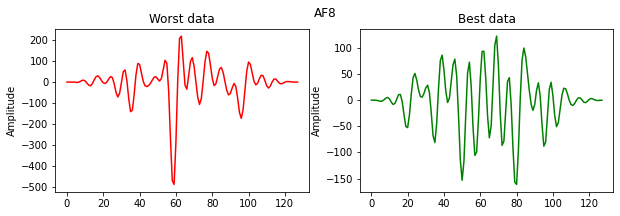

maximum gradient value of worst segment for TP10 is 16.330359
minimum gradient value of best segment for TP10 is 1.765336
number of non-artifactual segements for TP10 is 237
number of artifactual segements for TP10 is 3


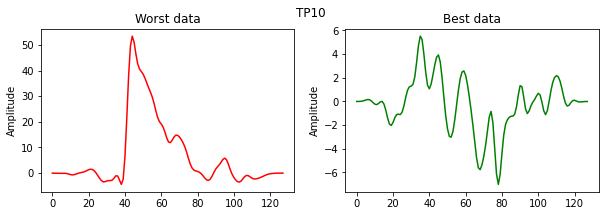

maximum gradient value of worst segment for TP9 is 23.079241
minimum gradient value of best segment for TP9 is 2.639278
number of non-artifactual segements for TP9 is 161
number of artifactual segements for TP9 is 79


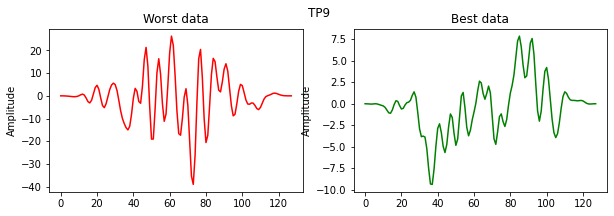

maximum gradient value of worst segment for AF7 is 44.419151
minimum gradient value of best segment for AF7 is 1.511593
number of non-artifactual segements for AF7 is 203
number of artifactual segements for AF7 is 37


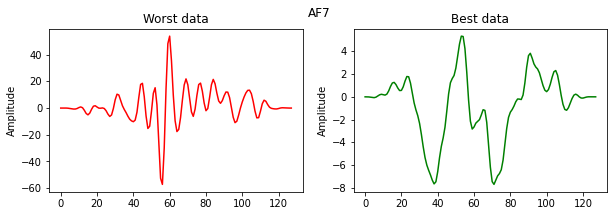

maximum gradient value of worst segment for AF8 is 34.006552
minimum gradient value of best segment for AF8 is 1.578595
number of non-artifactual segements for AF8 is 178
number of artifactual segements for AF8 is 62


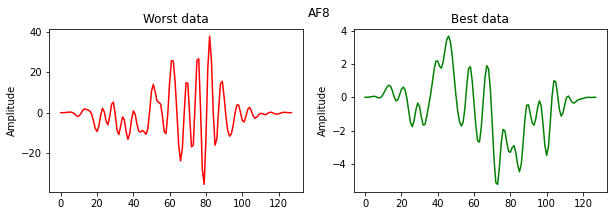

maximum gradient value of worst segment for TP10 is 21.193470
minimum gradient value of best segment for TP10 is 2.772505
number of non-artifactual segements for TP10 is 206
number of artifactual segements for TP10 is 34


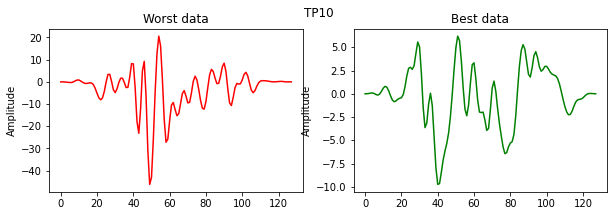

maximum gradient value of worst segment for TP9 is 31.201498
minimum gradient value of best segment for TP9 is 2.576146
number of non-artifactual segements for TP9 is 197
number of artifactual segements for TP9 is 43


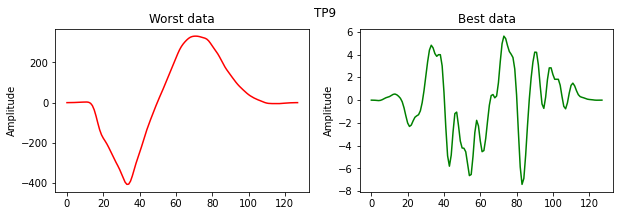

maximum gradient value of worst segment for AF7 is 326.220637
minimum gradient value of best segment for AF7 is 1.999599
number of non-artifactual segements for AF7 is 4
number of artifactual segements for AF7 is 236


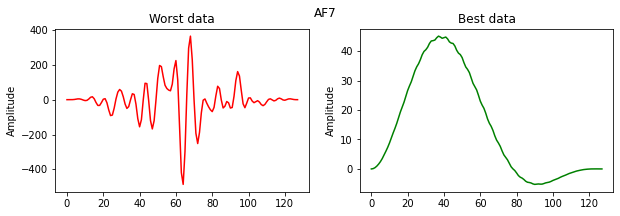

maximum gradient value of worst segment for AF8 is 35.159630
minimum gradient value of best segment for AF8 is 1.858479
number of non-artifactual segements for AF8 is 203
number of artifactual segements for AF8 is 37


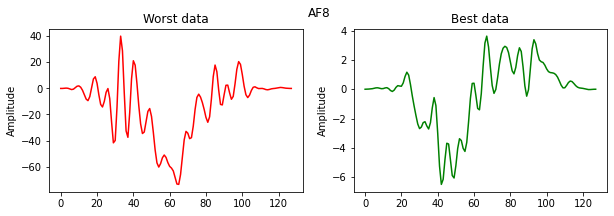

maximum gradient value of worst segment for TP10 is 274.274095
minimum gradient value of best segment for TP10 is 3.865162
number of non-artifactual segements for TP10 is 186
number of artifactual segements for TP10 is 54


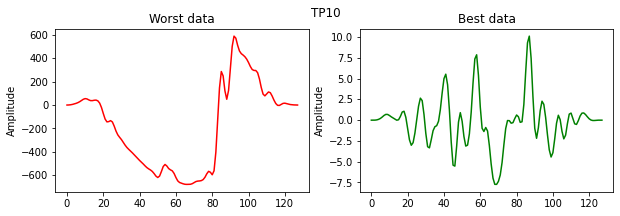

maximum gradient value of worst segment for TP9 is 26.033177
minimum gradient value of best segment for TP9 is 3.588107
number of non-artifactual segements for TP9 is 166
number of artifactual segements for TP9 is 74


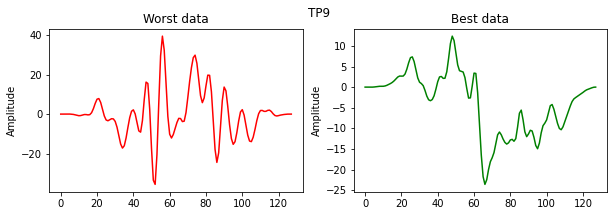

maximum gradient value of worst segment for AF7 is 71.425725
minimum gradient value of best segment for AF7 is 1.550915
number of non-artifactual segements for AF7 is 233
number of artifactual segements for AF7 is 7


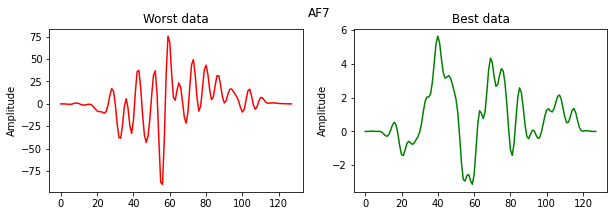

maximum gradient value of worst segment for AF8 is 42.013745
minimum gradient value of best segment for AF8 is 2.296349
number of non-artifactual segements for AF8 is 187
number of artifactual segements for AF8 is 53


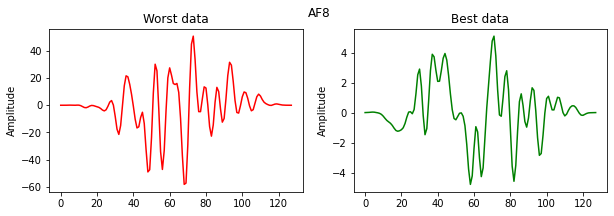

maximum gradient value of worst segment for TP10 is 30.151757
minimum gradient value of best segment for TP10 is 3.264038
number of non-artifactual segements for TP10 is 186
number of artifactual segements for TP10 is 54


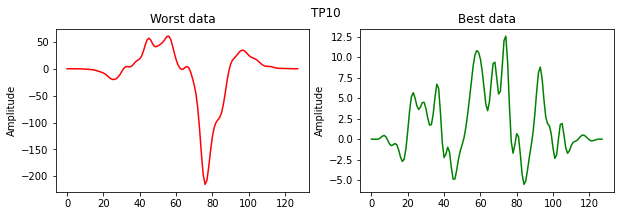

maximum gradient value of worst segment for TP9 is 52.390794
minimum gradient value of best segment for TP9 is 3.138897
number of non-artifactual segements for TP9 is 135
number of artifactual segements for TP9 is 105


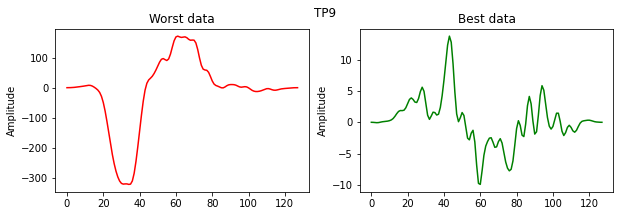

maximum gradient value of worst segment for AF7 is 116.325656
minimum gradient value of best segment for AF7 is 1.937952
number of non-artifactual segements for AF7 is 113
number of artifactual segements for AF7 is 127


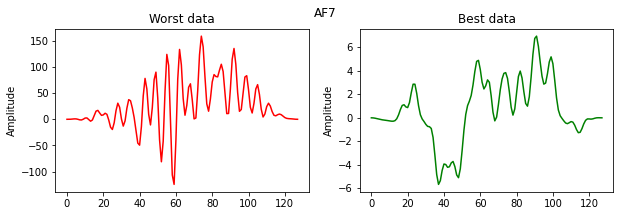

maximum gradient value of worst segment for AF8 is 71.003078
minimum gradient value of best segment for AF8 is 2.336771
number of non-artifactual segements for AF8 is 123
number of artifactual segements for AF8 is 117


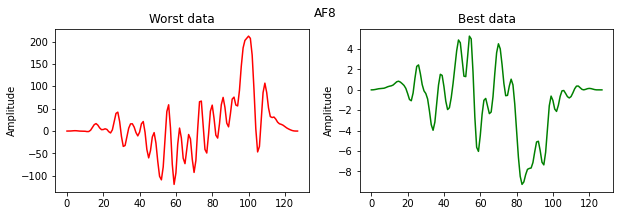

maximum gradient value of worst segment for TP10 is 62.315781
minimum gradient value of best segment for TP10 is 4.140363
number of non-artifactual segements for TP10 is 188
number of artifactual segements for TP10 is 52


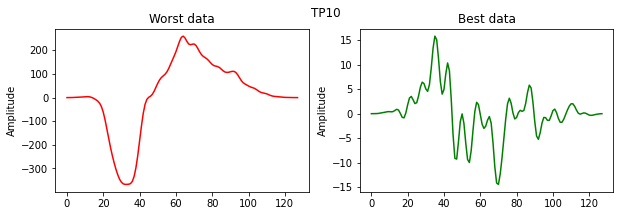

maximum gradient value of worst segment for TP9 is 17.962879
minimum gradient value of best segment for TP9 is 2.704486
number of non-artifactual segements for TP9 is 203
number of artifactual segements for TP9 is 37


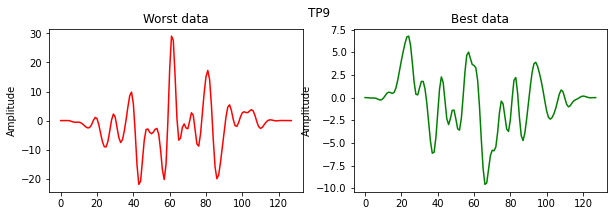

maximum gradient value of worst segment for AF7 is 181.460933
minimum gradient value of best segment for AF7 is 1.309397
number of non-artifactual segements for AF7 is 223
number of artifactual segements for AF7 is 17


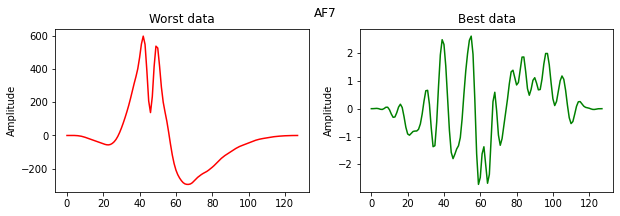

maximum gradient value of worst segment for AF8 is 24.434197
minimum gradient value of best segment for AF8 is 2.228440
number of non-artifactual segements for AF8 is 223
number of artifactual segements for AF8 is 17


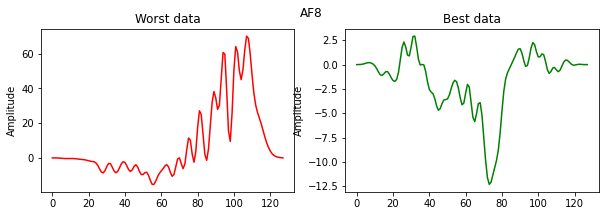

maximum gradient value of worst segment for TP10 is 19.220880
minimum gradient value of best segment for TP10 is 3.491098
number of non-artifactual segements for TP10 is 216
number of artifactual segements for TP10 is 24


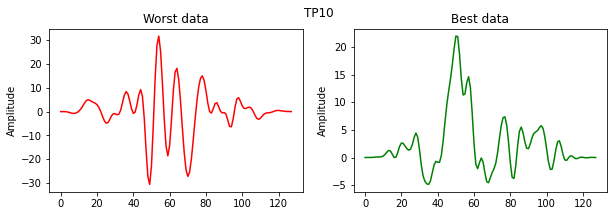

maximum gradient value of worst segment for TP9 is 30.486734
minimum gradient value of best segment for TP9 is 3.654779
number of non-artifactual segements for TP9 is 177
number of artifactual segements for TP9 is 63


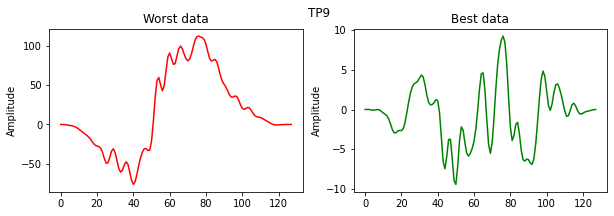

maximum gradient value of worst segment for AF7 is 30.514027
minimum gradient value of best segment for AF7 is 1.510613
number of non-artifactual segements for AF7 is 220
number of artifactual segements for AF7 is 20


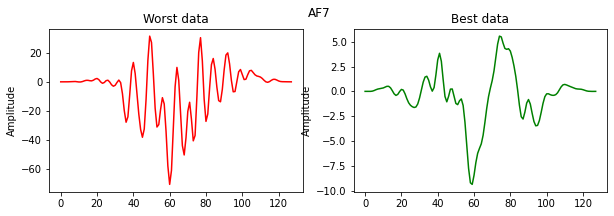

maximum gradient value of worst segment for AF8 is 60.416947
minimum gradient value of best segment for AF8 is 3.130637
number of non-artifactual segements for AF8 is 149
number of artifactual segements for AF8 is 91


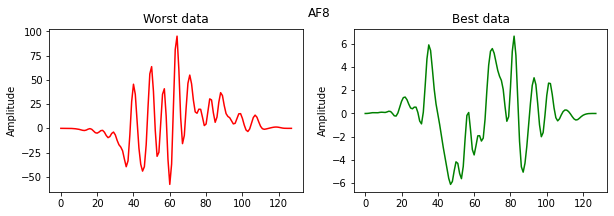

maximum gradient value of worst segment for TP10 is 20.684637
minimum gradient value of best segment for TP10 is 6.011587
number of non-artifactual segements for TP10 is 113
number of artifactual segements for TP10 is 127


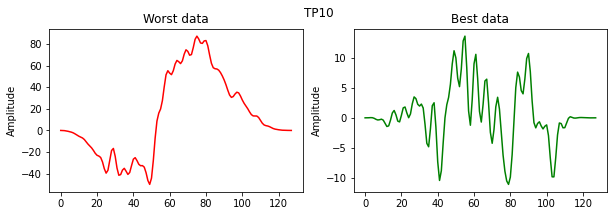

maximum gradient value of worst segment for TP9 is 53.065154
minimum gradient value of best segment for TP9 is 1.770251
number of non-artifactual segements for TP9 is 226
number of artifactual segements for TP9 is 14


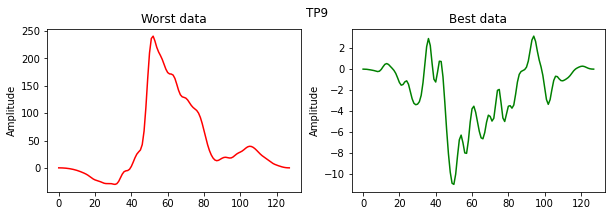

maximum gradient value of worst segment for AF7 is 31.481415
minimum gradient value of best segment for AF7 is 0.930853
number of non-artifactual segements for AF7 is 232
number of artifactual segements for AF7 is 8


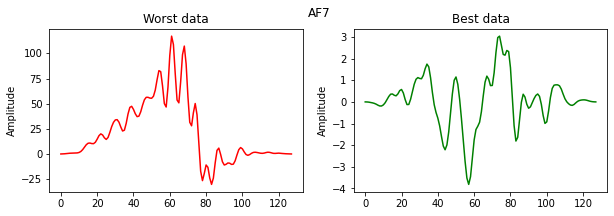

maximum gradient value of worst segment for AF8 is 377.662171
minimum gradient value of best segment for AF8 is 13.617073
number of non-artifactual segements for AF8 is 0
number of artifactual segements for AF8 is 240


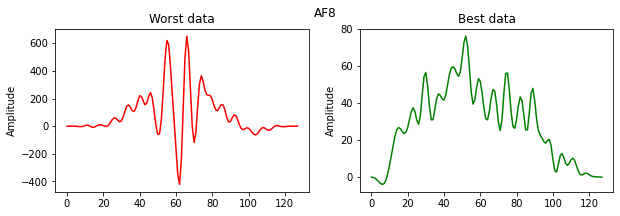

maximum gradient value of worst segment for TP10 is 18.184403
minimum gradient value of best segment for TP10 is 1.789483
number of non-artifactual segements for TP10 is 235
number of artifactual segements for TP10 is 5


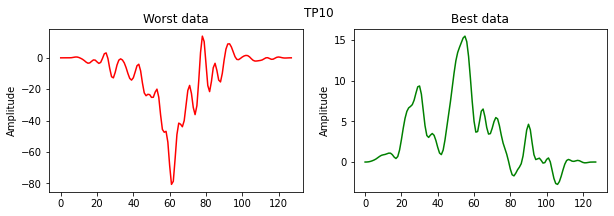

maximum gradient value of worst segment for TP9 is 19.629107
minimum gradient value of best segment for TP9 is 2.966581
number of non-artifactual segements for TP9 is 198
number of artifactual segements for TP9 is 42


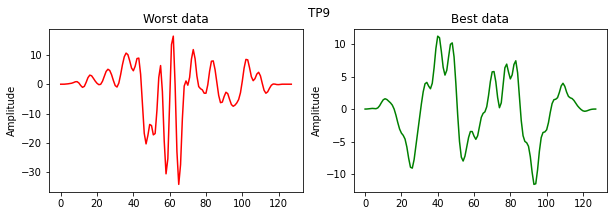

maximum gradient value of worst segment for AF7 is 13.481521
minimum gradient value of best segment for AF7 is 1.433021
number of non-artifactual segements for AF7 is 236
number of artifactual segements for AF7 is 4


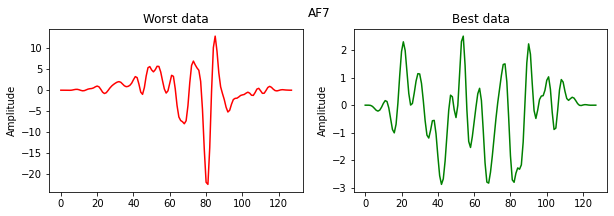

maximum gradient value of worst segment for AF8 is 43.424783
minimum gradient value of best segment for AF8 is 2.096072
number of non-artifactual segements for AF8 is 118
number of artifactual segements for AF8 is 122


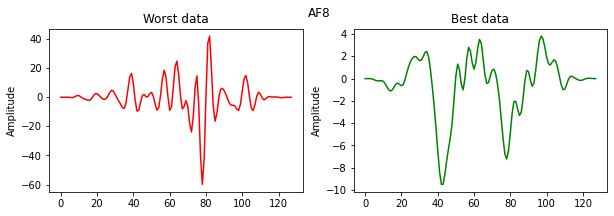

maximum gradient value of worst segment for TP10 is 13.743741
minimum gradient value of best segment for TP10 is 3.188406
number of non-artifactual segements for TP10 is 229
number of artifactual segements for TP10 is 11


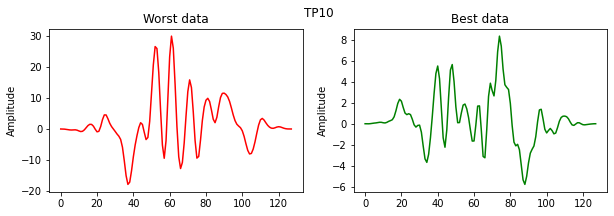

maximum gradient value of worst segment for TP9 is 14.418009
minimum gradient value of best segment for TP9 is 2.359560
number of non-artifactual segements for TP9 is 230
number of artifactual segements for TP9 is 10


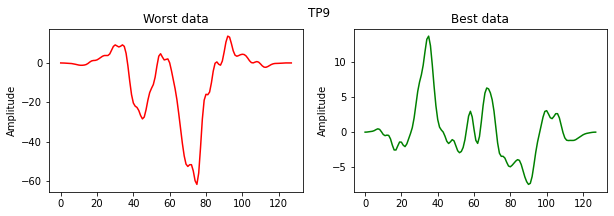

maximum gradient value of worst segment for AF7 is 7.429243
minimum gradient value of best segment for AF7 is 1.038284
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


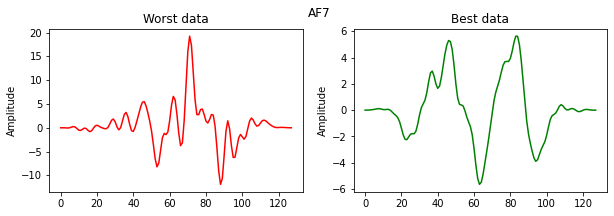

maximum gradient value of worst segment for AF8 is 19.053561
minimum gradient value of best segment for AF8 is 1.282633
number of non-artifactual segements for AF8 is 216
number of artifactual segements for AF8 is 24


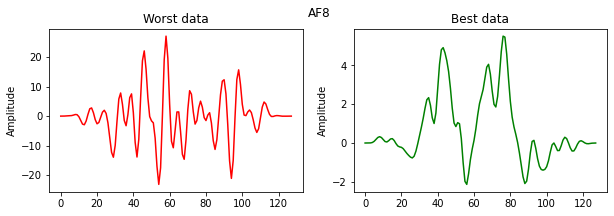

maximum gradient value of worst segment for TP10 is 9.210984
minimum gradient value of best segment for TP10 is 1.792150
number of non-artifactual segements for TP10 is 240
number of artifactual segements for TP10 is 0


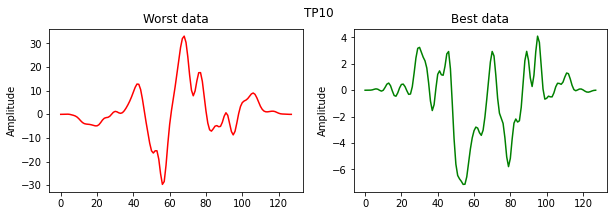

maximum gradient value of worst segment for TP9 is 439.282773
minimum gradient value of best segment for TP9 is 2.448478
number of non-artifactual segements for TP9 is 226
number of artifactual segements for TP9 is 14


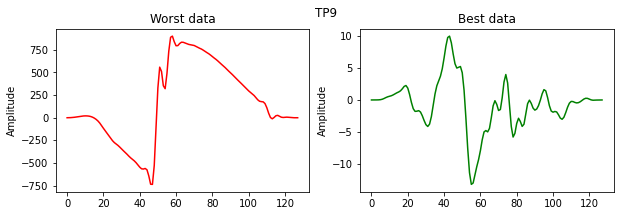

maximum gradient value of worst segment for AF7 is 33.355413
minimum gradient value of best segment for AF7 is 1.362065
number of non-artifactual segements for AF7 is 226
number of artifactual segements for AF7 is 14


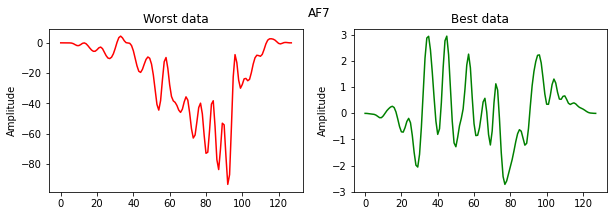

maximum gradient value of worst segment for AF8 is 20.994111
minimum gradient value of best segment for AF8 is 1.876212
number of non-artifactual segements for AF8 is 219
number of artifactual segements for AF8 is 21


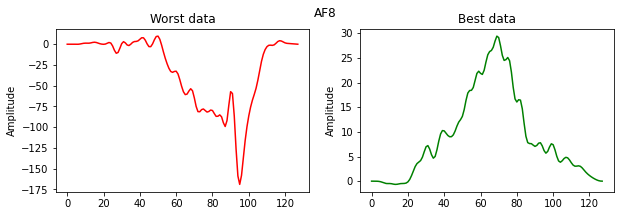

maximum gradient value of worst segment for TP10 is 254.820251
minimum gradient value of best segment for TP10 is 5.550131
number of non-artifactual segements for TP10 is 31
number of artifactual segements for TP10 is 209


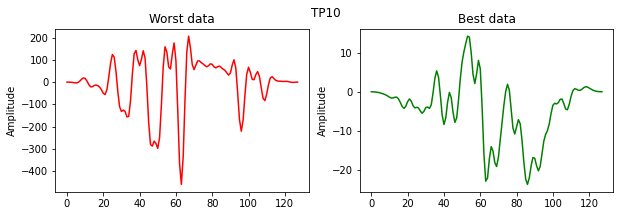

maximum gradient value of worst segment for TP9 is 19.939401
minimum gradient value of best segment for TP9 is 2.447990
number of non-artifactual segements for TP9 is 212
number of artifactual segements for TP9 is 28


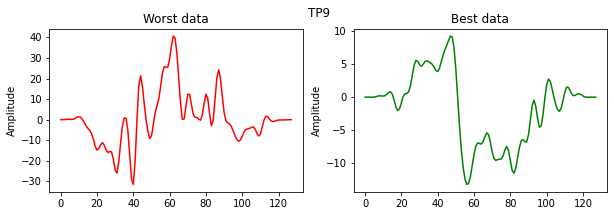

maximum gradient value of worst segment for AF7 is 33.455052
minimum gradient value of best segment for AF7 is 2.089703
number of non-artifactual segements for AF7 is 110
number of artifactual segements for AF7 is 130


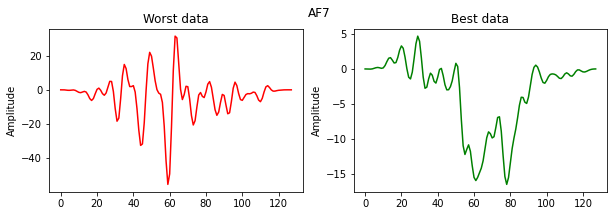

maximum gradient value of worst segment for AF8 is 18.811473
minimum gradient value of best segment for AF8 is 2.642379
number of non-artifactual segements for AF8 is 182
number of artifactual segements for AF8 is 58


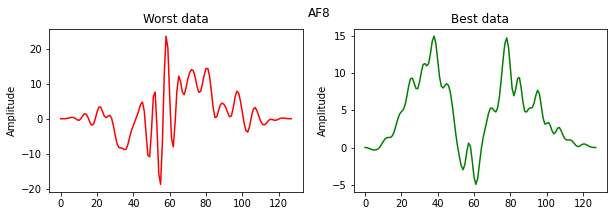

maximum gradient value of worst segment for TP10 is 17.155845
minimum gradient value of best segment for TP10 is 2.437950
number of non-artifactual segements for TP10 is 208
number of artifactual segements for TP10 is 32


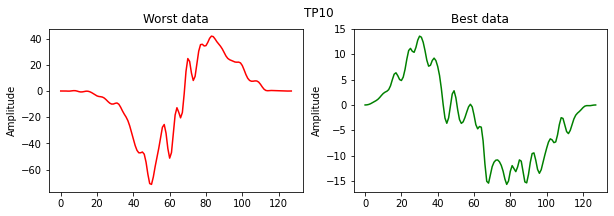

maximum gradient value of worst segment for TP9 is 51.028036
minimum gradient value of best segment for TP9 is 2.527989
number of non-artifactual segements for TP9 is 203
number of artifactual segements for TP9 is 37


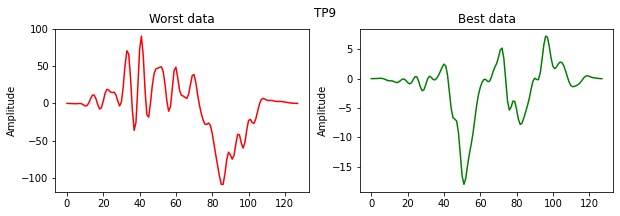

maximum gradient value of worst segment for AF7 is 42.694464
minimum gradient value of best segment for AF7 is 1.785353
number of non-artifactual segements for AF7 is 137
number of artifactual segements for AF7 is 103


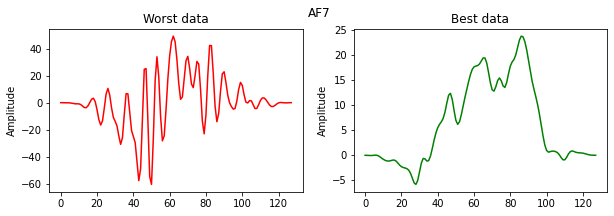

maximum gradient value of worst segment for AF8 is 30.833060
minimum gradient value of best segment for AF8 is 2.127229
number of non-artifactual segements for AF8 is 192
number of artifactual segements for AF8 is 48


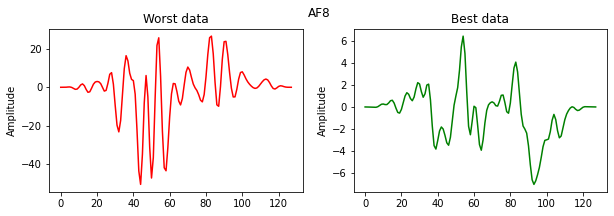

maximum gradient value of worst segment for TP10 is 27.373882
minimum gradient value of best segment for TP10 is 2.410916
number of non-artifactual segements for TP10 is 203
number of artifactual segements for TP10 is 37


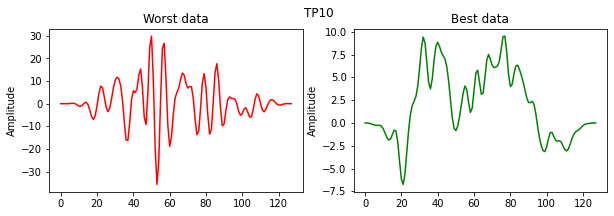

maximum gradient value of worst segment for TP9 is 31.140501
minimum gradient value of best segment for TP9 is 3.242392
number of non-artifactual segements for TP9 is 170
number of artifactual segements for TP9 is 70


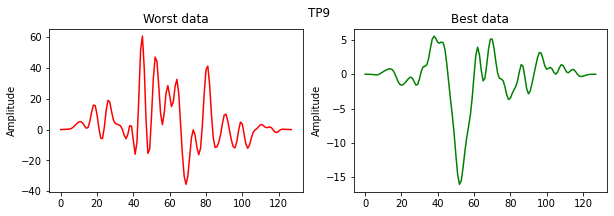

maximum gradient value of worst segment for AF7 is 36.556972
minimum gradient value of best segment for AF7 is 2.825032
number of non-artifactual segements for AF7 is 52
number of artifactual segements for AF7 is 188


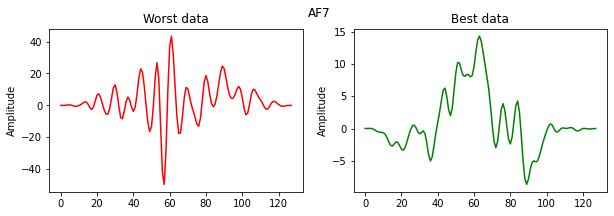

maximum gradient value of worst segment for AF8 is 25.833037
minimum gradient value of best segment for AF8 is 4.429095
number of non-artifactual segements for AF8 is 84
number of artifactual segements for AF8 is 156


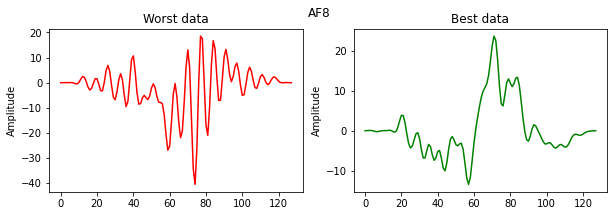

maximum gradient value of worst segment for TP10 is 25.988612
minimum gradient value of best segment for TP10 is 3.339274
number of non-artifactual segements for TP10 is 175
number of artifactual segements for TP10 is 65


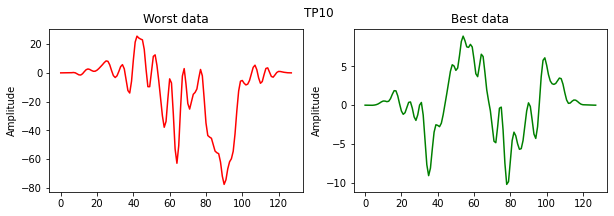

maximum gradient value of worst segment for TP9 is 40.776667
minimum gradient value of best segment for TP9 is 3.211517
number of non-artifactual segements for TP9 is 161
number of artifactual segements for TP9 is 79


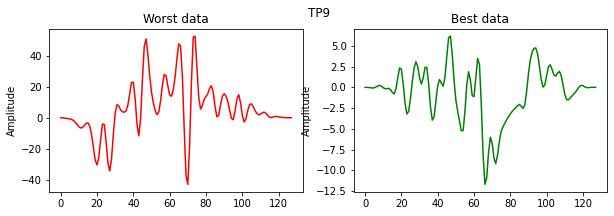

maximum gradient value of worst segment for AF7 is 82.731645
minimum gradient value of best segment for AF7 is 4.230774
number of non-artifactual segements for AF7 is 64
number of artifactual segements for AF7 is 176


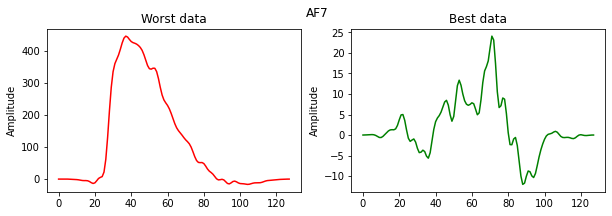

maximum gradient value of worst segment for AF8 is 44.760265
minimum gradient value of best segment for AF8 is 2.359993
number of non-artifactual segements for AF8 is 124
number of artifactual segements for AF8 is 116


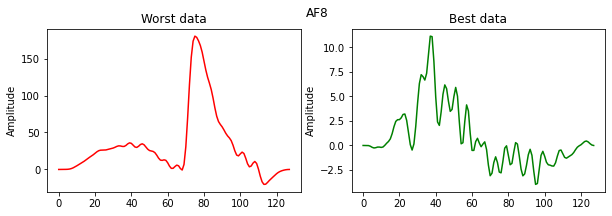

maximum gradient value of worst segment for TP10 is 40.682846
minimum gradient value of best segment for TP10 is 4.253286
number of non-artifactual segements for TP10 is 162
number of artifactual segements for TP10 is 78


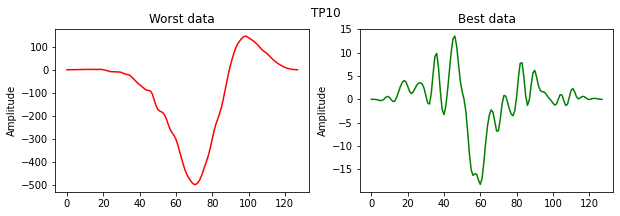

maximum gradient value of worst segment for TP9 is 31.353962
minimum gradient value of best segment for TP9 is 3.156722
number of non-artifactual segements for TP9 is 171
number of artifactual segements for TP9 is 69


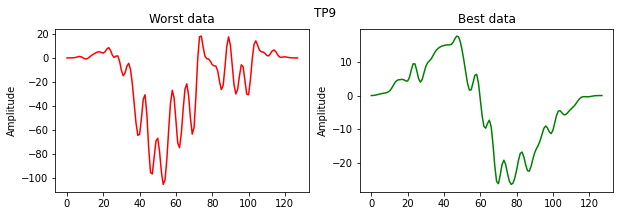

maximum gradient value of worst segment for AF7 is 34.786267
minimum gradient value of best segment for AF7 is 5.905609
number of non-artifactual segements for AF7 is 47
number of artifactual segements for AF7 is 193


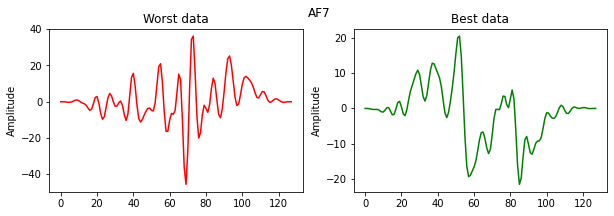

maximum gradient value of worst segment for AF8 is 120.007509
minimum gradient value of best segment for AF8 is 5.400558
number of non-artifactual segements for AF8 is 39
number of artifactual segements for AF8 is 201


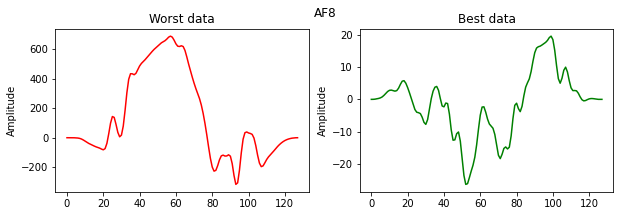

maximum gradient value of worst segment for TP10 is 83.810647
minimum gradient value of best segment for TP10 is 3.906579
number of non-artifactual segements for TP10 is 151
number of artifactual segements for TP10 is 89


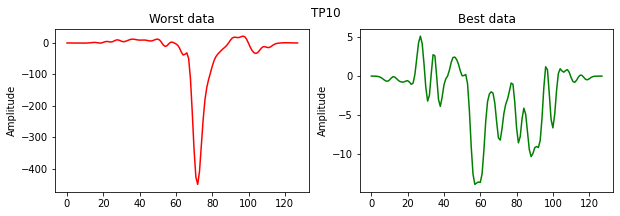

maximum gradient value of worst segment for TP9 is 12.795437
minimum gradient value of best segment for TP9 is 2.725062
number of non-artifactual segements for TP9 is 231
number of artifactual segements for TP9 is 9


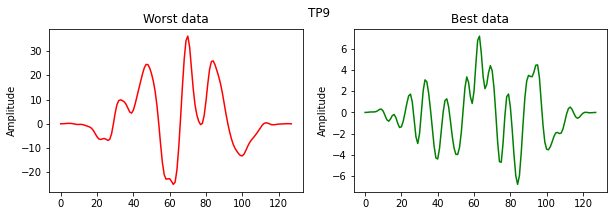

maximum gradient value of worst segment for AF7 is 14.321467
minimum gradient value of best segment for AF7 is 1.082818
number of non-artifactual segements for AF7 is 236
number of artifactual segements for AF7 is 4


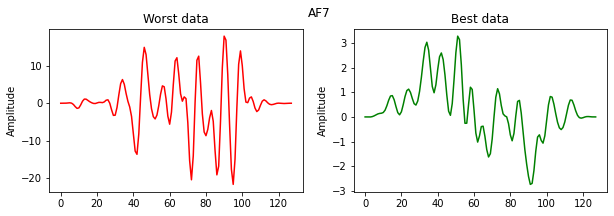

maximum gradient value of worst segment for AF8 is 14.152538
minimum gradient value of best segment for AF8 is 2.223213
number of non-artifactual segements for AF8 is 231
number of artifactual segements for AF8 is 9


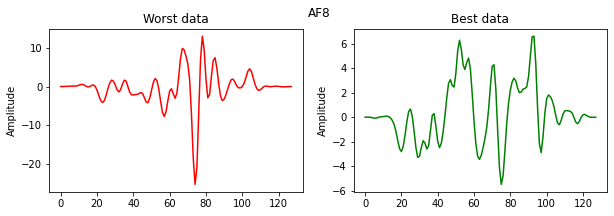

maximum gradient value of worst segment for TP10 is 12.728385
minimum gradient value of best segment for TP10 is 3.505695
number of non-artifactual segements for TP10 is 227
number of artifactual segements for TP10 is 13


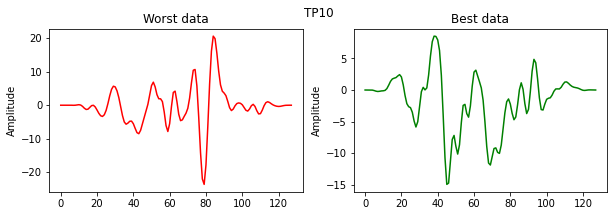

maximum gradient value of worst segment for TP9 is 14.704278
minimum gradient value of best segment for TP9 is 2.236040
number of non-artifactual segements for TP9 is 230
number of artifactual segements for TP9 is 10


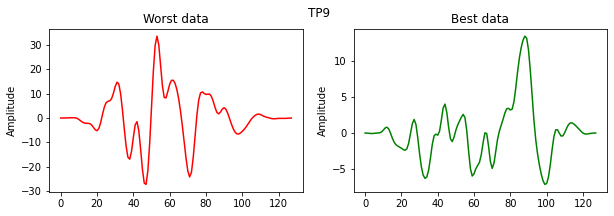

maximum gradient value of worst segment for AF7 is 10.109928
minimum gradient value of best segment for AF7 is 1.169763
number of non-artifactual segements for AF7 is 239
number of artifactual segements for AF7 is 1


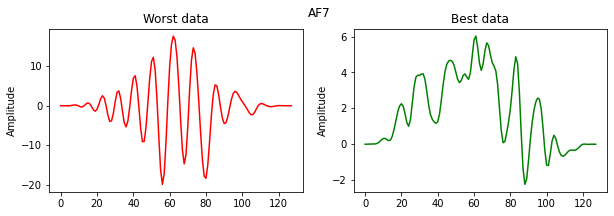

maximum gradient value of worst segment for AF8 is 15.785577
minimum gradient value of best segment for AF8 is 1.827872
number of non-artifactual segements for AF8 is 238
number of artifactual segements for AF8 is 2


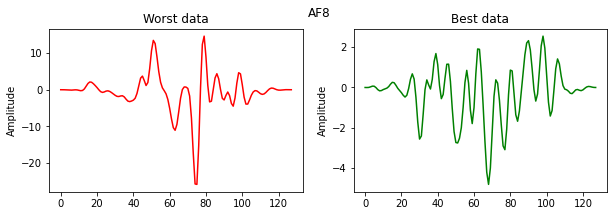

maximum gradient value of worst segment for TP10 is 20.404129
minimum gradient value of best segment for TP10 is 3.055489
number of non-artifactual segements for TP10 is 225
number of artifactual segements for TP10 is 15


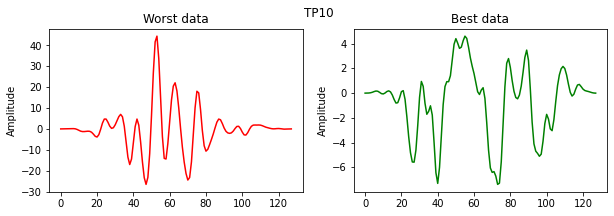

maximum gradient value of worst segment for TP9 is 14.558895
minimum gradient value of best segment for TP9 is 2.139101
number of non-artifactual segements for TP9 is 234
number of artifactual segements for TP9 is 6


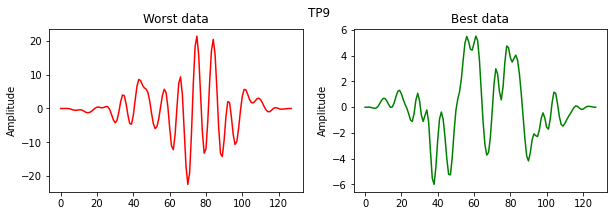

maximum gradient value of worst segment for AF7 is 8.288890
minimum gradient value of best segment for AF7 is 0.975078
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


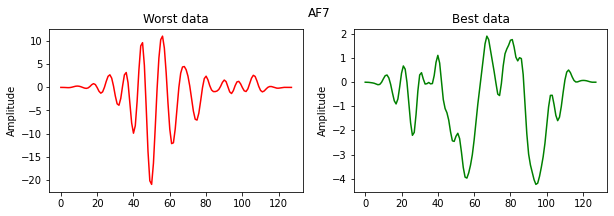

maximum gradient value of worst segment for AF8 is 13.965054
minimum gradient value of best segment for AF8 is 1.957946
number of non-artifactual segements for AF8 is 231
number of artifactual segements for AF8 is 9


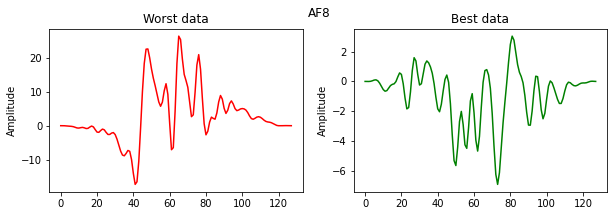

maximum gradient value of worst segment for TP10 is 14.260179
minimum gradient value of best segment for TP10 is 3.187710
number of non-artifactual segements for TP10 is 228
number of artifactual segements for TP10 is 12


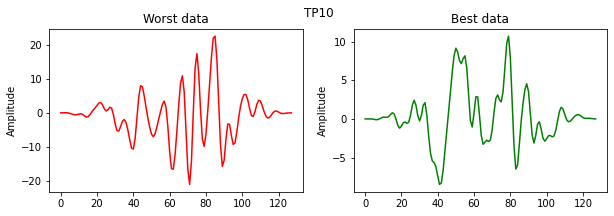

maximum gradient value of worst segment for TP9 is 12.571777
minimum gradient value of best segment for TP9 is 2.414244
number of non-artifactual segements for TP9 is 230
number of artifactual segements for TP9 is 10


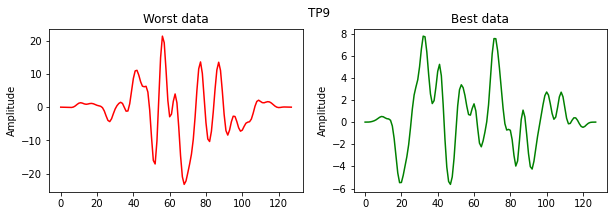

maximum gradient value of worst segment for AF7 is 31.803324
minimum gradient value of best segment for AF7 is 1.264281
number of non-artifactual segements for AF7 is 237
number of artifactual segements for AF7 is 3


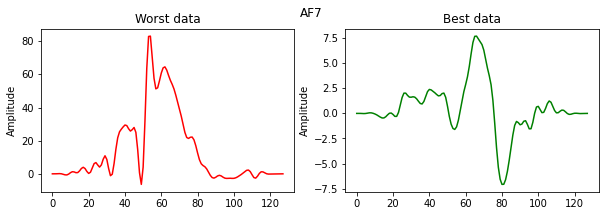

maximum gradient value of worst segment for AF8 is 194.832511
minimum gradient value of best segment for AF8 is 6.296338
number of non-artifactual segements for AF8 is 18
number of artifactual segements for AF8 is 222


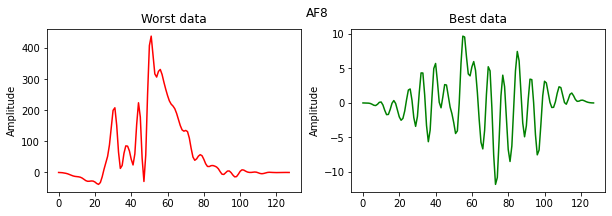

maximum gradient value of worst segment for TP10 is 15.705686
minimum gradient value of best segment for TP10 is 1.619499
number of non-artifactual segements for TP10 is 238
number of artifactual segements for TP10 is 2


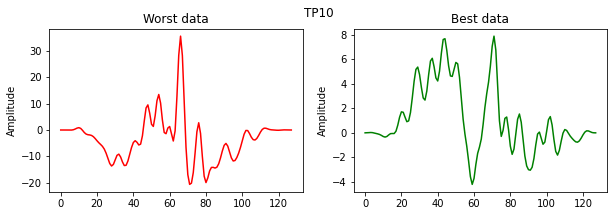

maximum gradient value of worst segment for TP9 is 27.207110
minimum gradient value of best segment for TP9 is 3.306488
number of non-artifactual segements for TP9 is 227
number of artifactual segements for TP9 is 13


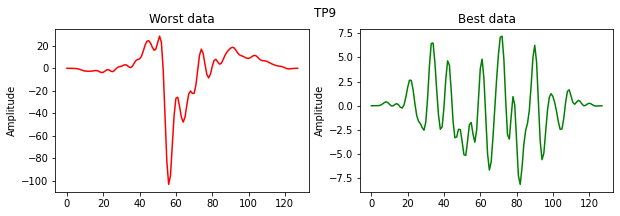

maximum gradient value of worst segment for AF7 is 19.800362
minimum gradient value of best segment for AF7 is 1.583425
number of non-artifactual segements for AF7 is 233
number of artifactual segements for AF7 is 7


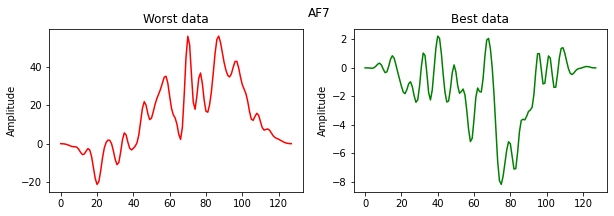

maximum gradient value of worst segment for AF8 is 227.987854
minimum gradient value of best segment for AF8 is 6.317034
number of non-artifactual segements for AF8 is 23
number of artifactual segements for AF8 is 217


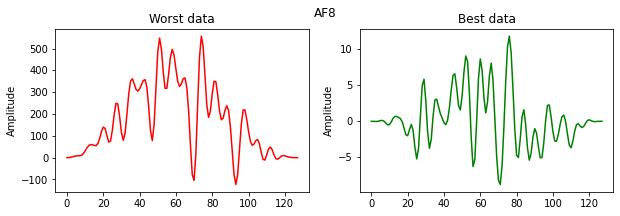

maximum gradient value of worst segment for TP10 is 16.433598
minimum gradient value of best segment for TP10 is 2.458308
number of non-artifactual segements for TP10 is 233
number of artifactual segements for TP10 is 7


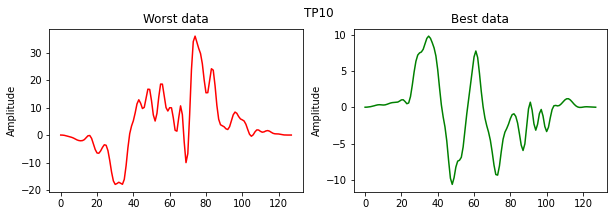

maximum gradient value of worst segment for TP9 is 33.882763
minimum gradient value of best segment for TP9 is 3.509104
number of non-artifactual segements for TP9 is 146
number of artifactual segements for TP9 is 94


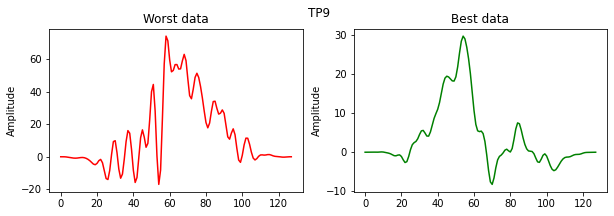

maximum gradient value of worst segment for AF7 is 54.299746
minimum gradient value of best segment for AF7 is 4.579747
number of non-artifactual segements for AF7 is 28
number of artifactual segements for AF7 is 212


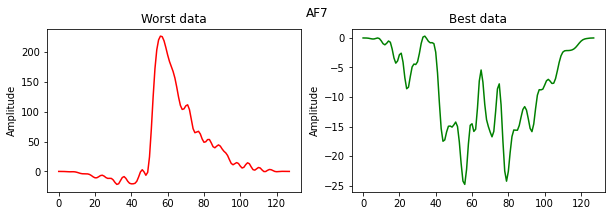

maximum gradient value of worst segment for AF8 is 33.842130
minimum gradient value of best segment for AF8 is 4.797877
number of non-artifactual segements for AF8 is 91
number of artifactual segements for AF8 is 149


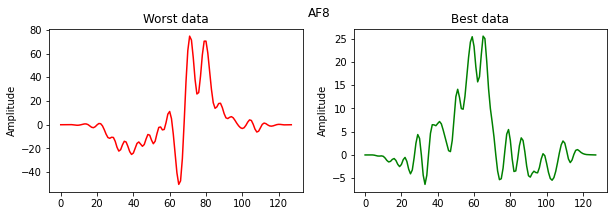

maximum gradient value of worst segment for TP10 is 331.295352
minimum gradient value of best segment for TP10 is 3.962027
number of non-artifactual segements for TP10 is 133
number of artifactual segements for TP10 is 107


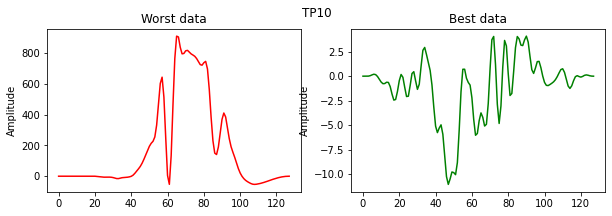

maximum gradient value of worst segment for TP9 is 41.765941
minimum gradient value of best segment for TP9 is 3.970444
number of non-artifactual segements for TP9 is 131
number of artifactual segements for TP9 is 109


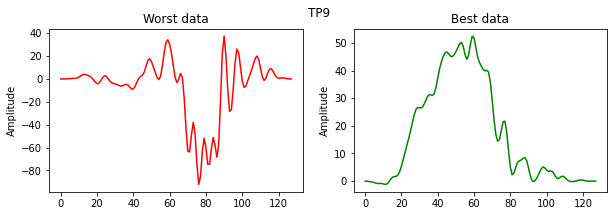

maximum gradient value of worst segment for AF7 is 48.747539
minimum gradient value of best segment for AF7 is 3.687059
number of non-artifactual segements for AF7 is 21
number of artifactual segements for AF7 is 219


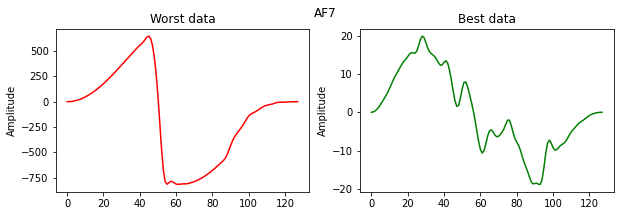

maximum gradient value of worst segment for AF8 is 120.278904
minimum gradient value of best segment for AF8 is 3.094210
number of non-artifactual segements for AF8 is 79
number of artifactual segements for AF8 is 161


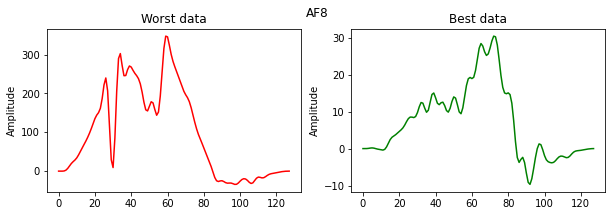

maximum gradient value of worst segment for TP10 is 166.674040
minimum gradient value of best segment for TP10 is 4.583914
number of non-artifactual segements for TP10 is 124
number of artifactual segements for TP10 is 116


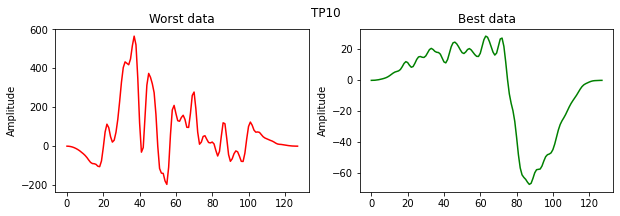

maximum gradient value of worst segment for TP9 is 117.805023
minimum gradient value of best segment for TP9 is 2.733171
number of non-artifactual segements for TP9 is 178
number of artifactual segements for TP9 is 62


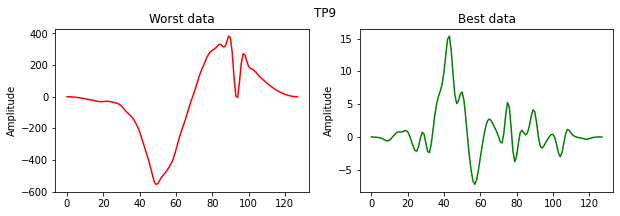

maximum gradient value of worst segment for AF7 is 107.139337
minimum gradient value of best segment for AF7 is 1.597001
number of non-artifactual segements for AF7 is 81
number of artifactual segements for AF7 is 159


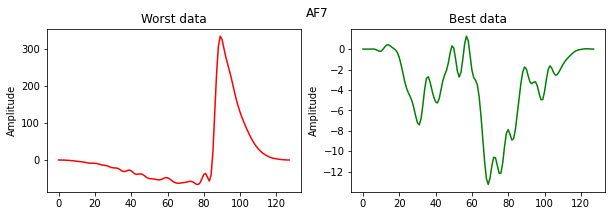

maximum gradient value of worst segment for AF8 is 136.621182
minimum gradient value of best segment for AF8 is 3.684606
number of non-artifactual segements for AF8 is 130
number of artifactual segements for AF8 is 110


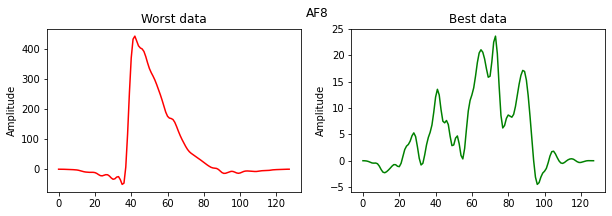

maximum gradient value of worst segment for TP10 is 38.670892
minimum gradient value of best segment for TP10 is 3.250675
number of non-artifactual segements for TP10 is 174
number of artifactual segements for TP10 is 66


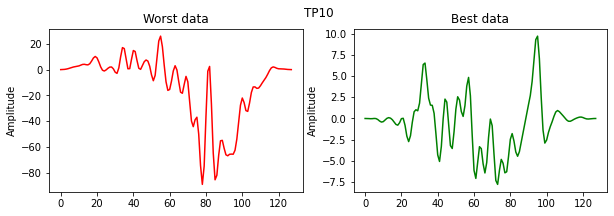

maximum gradient value of worst segment for TP9 is 54.915236
minimum gradient value of best segment for TP9 is 2.935772
number of non-artifactual segements for TP9 is 169
number of artifactual segements for TP9 is 71


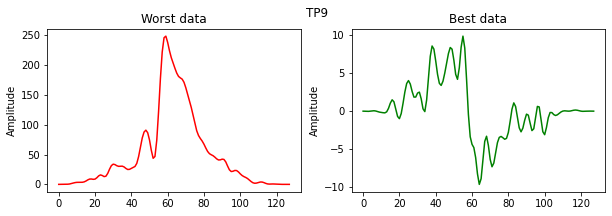

maximum gradient value of worst segment for AF7 is 80.993806
minimum gradient value of best segment for AF7 is 1.982110
number of non-artifactual segements for AF7 is 106
number of artifactual segements for AF7 is 134


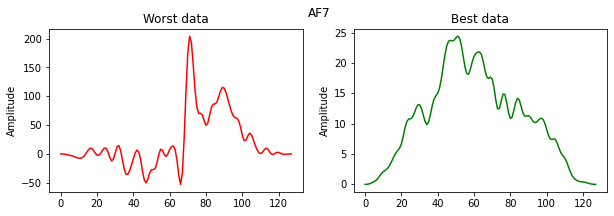

maximum gradient value of worst segment for AF8 is 127.549885
minimum gradient value of best segment for AF8 is 2.282394
number of non-artifactual segements for AF8 is 133
number of artifactual segements for AF8 is 107


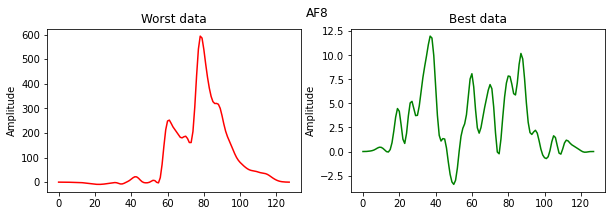

maximum gradient value of worst segment for TP10 is 378.276365
minimum gradient value of best segment for TP10 is 2.880451
number of non-artifactual segements for TP10 is 155
number of artifactual segements for TP10 is 85


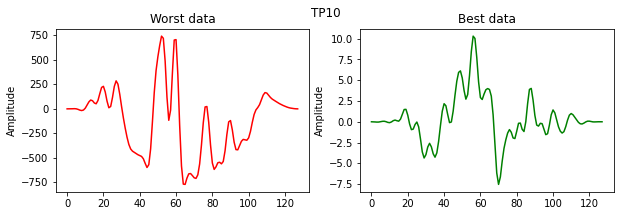

maximum gradient value of worst segment for TP9 is 19.086739
minimum gradient value of best segment for TP9 is 3.672700
number of non-artifactual segements for TP9 is 175
number of artifactual segements for TP9 is 65


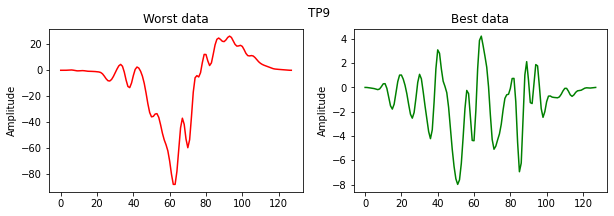

maximum gradient value of worst segment for AF7 is 46.058737
minimum gradient value of best segment for AF7 is 6.524781
number of non-artifactual segements for AF7 is 31
number of artifactual segements for AF7 is 209


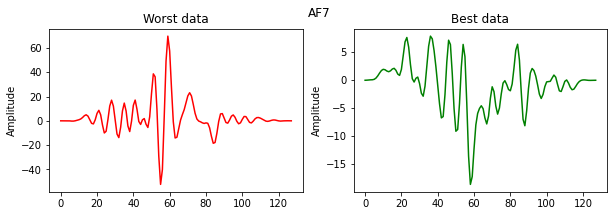

maximum gradient value of worst segment for AF8 is 25.975884
minimum gradient value of best segment for AF8 is 5.806086
number of non-artifactual segements for AF8 is 61
number of artifactual segements for AF8 is 179


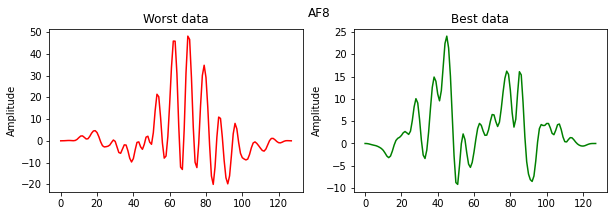

maximum gradient value of worst segment for TP10 is 19.064722
minimum gradient value of best segment for TP10 is 4.027616
number of non-artifactual segements for TP10 is 163
number of artifactual segements for TP10 is 77


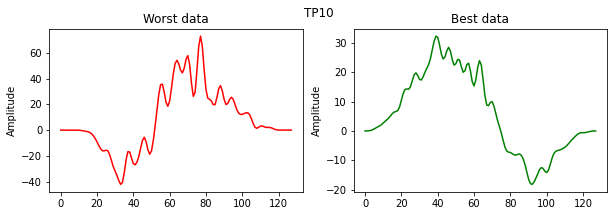

maximum gradient value of worst segment for TP9 is 22.867456
minimum gradient value of best segment for TP9 is 2.061156
number of non-artifactual segements for TP9 is 214
number of artifactual segements for TP9 is 26


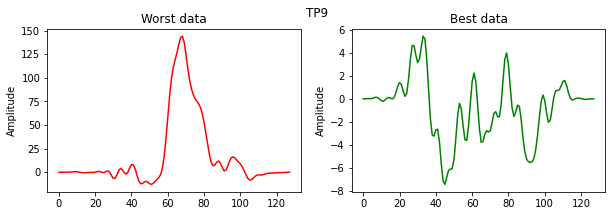

maximum gradient value of worst segment for AF7 is 26.673773
minimum gradient value of best segment for AF7 is 1.697624
number of non-artifactual segements for AF7 is 227
number of artifactual segements for AF7 is 13


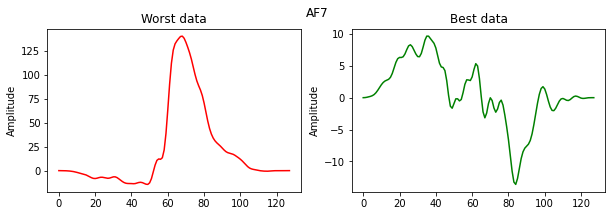

maximum gradient value of worst segment for AF8 is 335.677969
minimum gradient value of best segment for AF8 is 2.500023
number of non-artifactual segements for AF8 is 157
number of artifactual segements for AF8 is 83


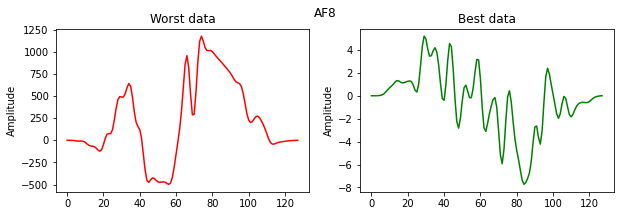

maximum gradient value of worst segment for TP10 is 22.348145
minimum gradient value of best segment for TP10 is 2.384792
number of non-artifactual segements for TP10 is 230
number of artifactual segements for TP10 is 10


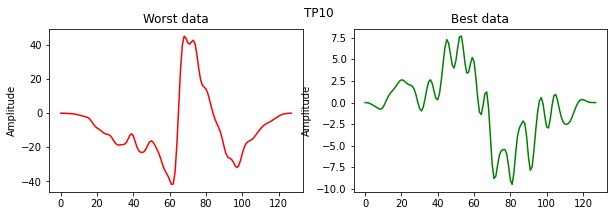

maximum gradient value of worst segment for TP9 is 26.975960
minimum gradient value of best segment for TP9 is 3.373486
number of non-artifactual segements for TP9 is 219
number of artifactual segements for TP9 is 21


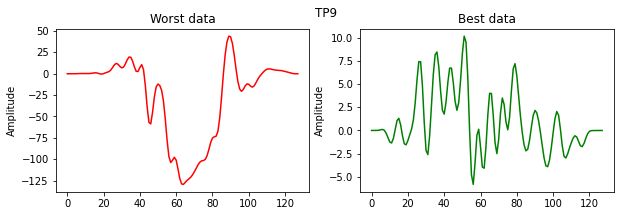

maximum gradient value of worst segment for AF7 is 10.272976
minimum gradient value of best segment for AF7 is 1.444971
number of non-artifactual segements for AF7 is 239
number of artifactual segements for AF7 is 1


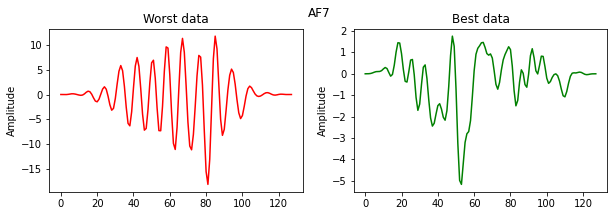

maximum gradient value of worst segment for AF8 is 17.449428
minimum gradient value of best segment for AF8 is 2.140654
number of non-artifactual segements for AF8 is 235
number of artifactual segements for AF8 is 5


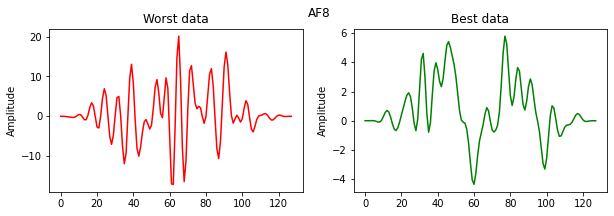

maximum gradient value of worst segment for TP10 is 12.788085
minimum gradient value of best segment for TP10 is 2.342304
number of non-artifactual segements for TP10 is 237
number of artifactual segements for TP10 is 3


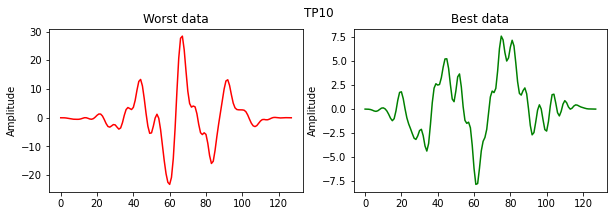

maximum gradient value of worst segment for TP9 is 26.505648
minimum gradient value of best segment for TP9 is 2.959503
number of non-artifactual segements for TP9 is 199
number of artifactual segements for TP9 is 41


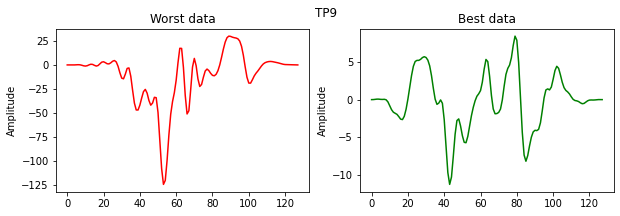

maximum gradient value of worst segment for AF7 is 11.879316
minimum gradient value of best segment for AF7 is 0.913577
number of non-artifactual segements for AF7 is 239
number of artifactual segements for AF7 is 1


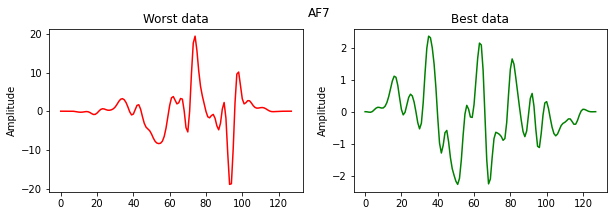

maximum gradient value of worst segment for AF8 is 20.093700
minimum gradient value of best segment for AF8 is 1.179611
number of non-artifactual segements for AF8 is 236
number of artifactual segements for AF8 is 4


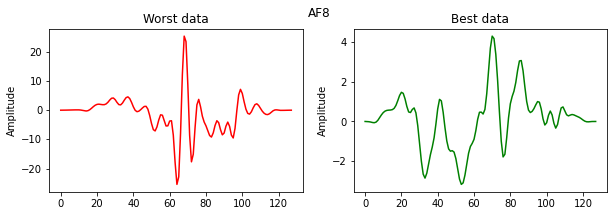

maximum gradient value of worst segment for TP10 is 10.791328
minimum gradient value of best segment for TP10 is 2.333896
number of non-artifactual segements for TP10 is 236
number of artifactual segements for TP10 is 4


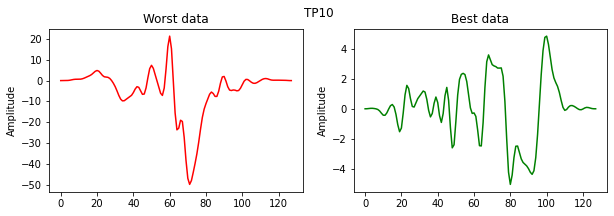

maximum gradient value of worst segment for TP9 is 18.614724
minimum gradient value of best segment for TP9 is 2.831001
number of non-artifactual segements for TP9 is 231
number of artifactual segements for TP9 is 9


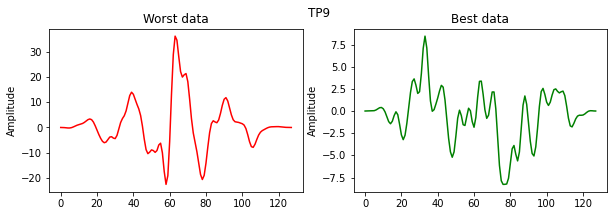

maximum gradient value of worst segment for AF7 is 8.187864
minimum gradient value of best segment for AF7 is 1.294956
number of non-artifactual segements for AF7 is 240
number of artifactual segements for AF7 is 0


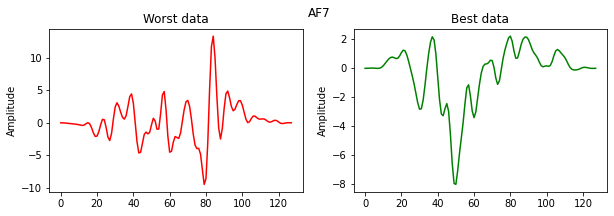

maximum gradient value of worst segment for AF8 is 16.443558
minimum gradient value of best segment for AF8 is 1.476998
number of non-artifactual segements for AF8 is 235
number of artifactual segements for AF8 is 5


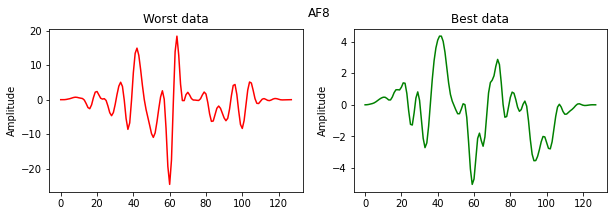

maximum gradient value of worst segment for TP10 is 10.965559
minimum gradient value of best segment for TP10 is 2.829428
number of non-artifactual segements for TP10 is 235
number of artifactual segements for TP10 is 5


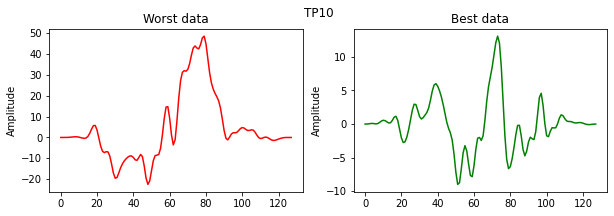

maximum gradient value of worst segment for TP9 is 16.928628
minimum gradient value of best segment for TP9 is 2.547054
number of non-artifactual segements for TP9 is 231
number of artifactual segements for TP9 is 9


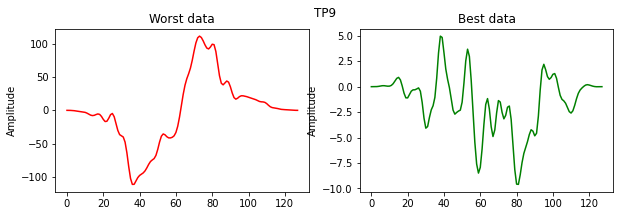

maximum gradient value of worst segment for AF7 is 15.833664
minimum gradient value of best segment for AF7 is 1.505823
number of non-artifactual segements for AF7 is 238
number of artifactual segements for AF7 is 2


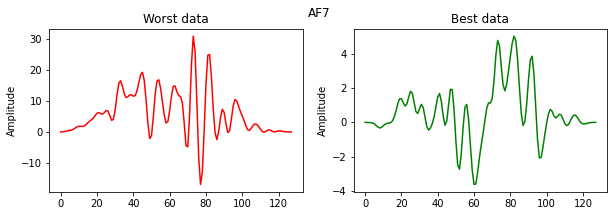

maximum gradient value of worst segment for AF8 is 33.179540
minimum gradient value of best segment for AF8 is 2.030170
number of non-artifactual segements for AF8 is 234
number of artifactual segements for AF8 is 6


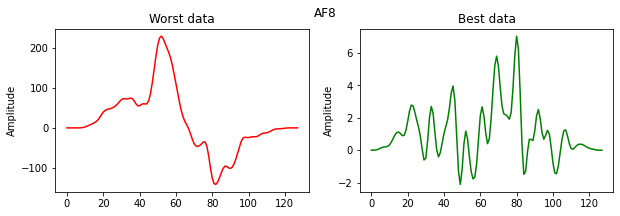

maximum gradient value of worst segment for TP10 is 15.256375
minimum gradient value of best segment for TP10 is 2.675226
number of non-artifactual segements for TP10 is 236
number of artifactual segements for TP10 is 4


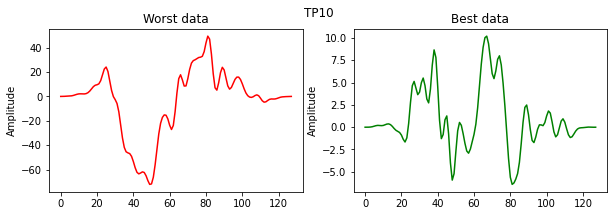

In [7]:
threshold_value,window_size,step_size,channels,choice_numwindows = 10,0.5,0.5,['TP9','AF7','AF8','TP10'],100
arM11 = multipleArtfRemoval(band_M11,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arM21 = multipleArtfRemoval(band_M21,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arM12 = multipleArtfRemoval(band_M12,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arM22 = multipleArtfRemoval(band_M22,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arC11 = multipleArtfRemoval(band_C11,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arC21 = multipleArtfRemoval(band_C21,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arC12 = multipleArtfRemoval(band_C12,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)
arC22 = multipleArtfRemoval(band_C22,threshold_value,time_s,window_size,step_size,choice_numwindows,channels)

<b>Denoise<b>

In [8]:
args_1 = {'time_s':time_s,'fs':256,'figsize':[35,15],'subTitles':['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],'title':'Raw','tickRange':[0,120],'timeFrequencyDomainPlots':True}
args_2 = {'time_s':time_s,'fs':256,'figsize':[35,15],'subTitles':['ADAP_TP9','RAW_AF7','RAW_AF8','ADAP_TP10'],'title':'Adaptive','tickRange':[0,120],'timeFrequencyDomainPlots':True}

<b>M11_1<b>